In [1]:
%load_ext autoreload
%autoreload 2
from WST import WST
import os

In [2]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG_MSC/CARS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = WST(path, MAX_COMPONENTS=10, col_group=col_group, cutoff=0.5)

Training/Testing split: 70.0% training, 30.0% testing
Training samples: 138
Testing samples: 60

Train/Test split by Class and Stress_weight:
  Class Controlled (C), Stress_weight 20: 22 train, 10 test
  Class Controlled (C), Stress_weight 40: 22 train, 9 test
  Class Controlled (C), Stress_weight 60: 21 train, 10 test
  Class Stressed Water (W), Stress_weight 20: 24 train, 10 test
  Class Stressed Water (W), Stress_weight 40: 25 train, 11 test
  Class Stressed Water (W), Stress_weight 60: 24 train, 10 test


In [3]:
c.compute_survived_wavelengths_best_score()
c.plot_survived_df

,Wavelengths,count
0,400.000,5.0
1,401.000,3.0
2,402.000,1.0
3,403.000,5.0
4,404.000,3.0
...,...,...
2096,2496.000,5.0
2097,2497.000,1.0
2098,2498.000,3.0
2099,2499.000,4.0


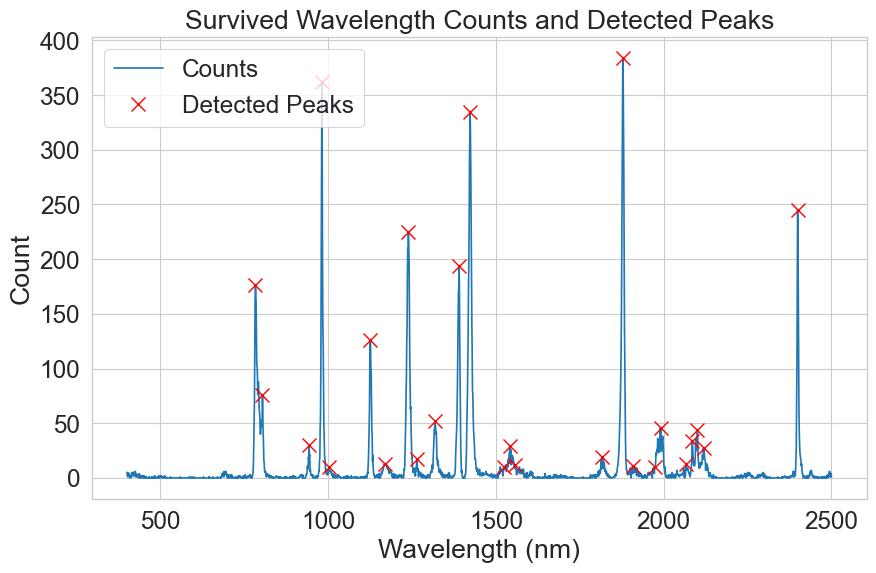

Peak-detected indices using SciPy: [1478, 581, 1023, 1999, 839, 990, 383, 725, 404, 918, 1591, 1700, 1685, 543, 1141, 1720, 1417, 864, 1667, 768, 1158, 1507, 603, 1573, 1124]

Total combinations to test: 1

Combination 0: ['783.000', '804.000', '943.000', '981.000', '1003.000', '1125.000', '1168.000', '1239.000', '1264.000', '1318.000', '1390.000', '1423.000', '1524.000', '1541.000', '1558.000', '1817.000', '1878.000', '1907.000', '1973.000', '1991.000', '2067.000', '2085.000', '2100.000', '2120.000', '2399.000']
Number of wavelengths: 25
Accuracy: 0.83, Recall: 0.90, Precision: 0.80, Specifity: 0.76, F1: 0.85 , nLV: 6, Cutoff: 0.50

True & 25 & 0.83 & 0.90 & 0.80 & 0.85  & 6.00  & 0.50 \ \hline

Mismatched indices: [ 0  5  8 13 15 18 25 28 33 58]
Correct class values: ['Stressed Water (W)' 'Controlled (C)' 'Controlled (C)'
 'Stressed Water (W)' 'Controlled (C)' 'Stressed Water (W)'
 'Controlled (C)' 'Controlled (C)' 'Controlled (C)' 'Controlled (C)']
Corresponding Stress_weight values

In [4]:
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=None, learning_curve=False, pls_plot=False, peak_detection=True, peak_distance=15, peak_height=10, confusion_matrix_f=True)

import numpy as np
import pandas as pd

# Step 1: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test.flatten())[0]

# Step 2: Get the correct class values from c.y_test
correct_classes = c.y_test[diff_indices]

# Step 3: Get the corresponding Stress_weight values from the test index
stress_weights = list(c.index_testing.get_level_values('Stress_weight')[diff_indices])

# If you want to print or return the results
print("Mismatched indices:", diff_indices)
print("Correct class values:", correct_classes)
print("Corresponding Stress_weight values:", stress_weights)

In [5]:
for i in l:
    print(len(i))
    c.permutation_test(wavelengths=i)

25
